In [38]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.1'

In [39]:
keras.__version__

'2.4.0'

In [40]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [41]:
X_train_full.shape

(60000, 28, 28)

In [42]:
X_train_full.dtype

dtype('uint8')

## Building an image classifier using Sequential API

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2)
X_train, X_val, y_train, y_val = X_train / 255.0, X_val / 255.0, y_train, y_val
X_test = X_test / 255.0

In [44]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Sneaker'

## Creating the model using Keras' Sequential API

In [45]:
model = keras.models.Sequential() #create sequential model
model.add(keras.layers.Flatten(input_shape=[28, 28])) #this layers flattens the input into shape (-1, 1)

#Dense hidden layer w/ 300 neurons. Each neuron has matrix of connection weights to all input neurons and bias vector
model.add(keras.layers.Dense(300, activation="relu")) #computes h(X) = activation_func(XW + b); activiation_func = relu in this case

model.add(keras.layers.Dense(100, activation="relu")) #another dense hidden layer w/ 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) #output layer with 10 neurons (1 for each class)

### *alternative way of instantiating a sequential model* 

In [46]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") ## softmax because this is a multiclass classification problem (mutually exclusive classes)
])

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


235500 params for first hidden layer = 784 input neurons * 300 connection weights + 300 bias terms

In [48]:
hidden1 = model.layers[1]
print(hidden1.name)

dense_15


In [49]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [50]:
biases.shape

(300,)

In [51]:
weights

array([[ 0.02502829,  0.03634427, -0.02444338, ...,  0.06212674,
         0.00993205, -0.01818871],
       [ 0.03945725, -0.07127587,  0.00503649, ..., -0.00708638,
         0.02942111,  0.00714642],
       [-0.06993404,  0.06788419, -0.00108466, ...,  0.03778134,
         0.04938715, -0.06785483],
       ...,
       [-0.05095048, -0.01721959, -0.03743255, ...,  0.01459029,
         0.07280646, -0.05964642],
       [ 0.0200003 ,  0.0532352 ,  0.0370244 , ..., -0.0076312 ,
         0.00932048, -0.02185252],
       [ 0.05292745,  0.05776621,  0.0544083 , ..., -0.05844232,
         0.02696627,  0.04957886]], dtype=float32)

The weights of the input layer are initialized randomly to break the symmetry and conquer the enemy

In [52]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The biases are intialized to zero

In [53]:
# optimizer (stochastic gradient descent) used for backpropagation. use object rather than string so that learning rate can be specified
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])  

For the case of predicting fashion MNIST, using sparse_categorical_crossentropy as the loss function makes sense because the labels are sparse (range 0-9) and can be encoded into a one-hot vector ([0,0,1,0,0,0,0,0,0,0] for class 3 if it wasn't sparse. 

In [54]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1500/1500 [==============================] - 2s 997us/step - loss: 1.0139 - accuracy: 0.6767 - val_loss: 0.5201 - val_accuracy: 0.8251
Epoch 2/30
1500/1500 [==============================] - 1s 917us/step - loss: 0.5110 - accuracy: 0.8231 - val_loss: 0.4544 - val_accuracy: 0.8418
Epoch 3/30
1500/1500 [==============================] - 1s 962us/step - loss: 0.4549 - accuracy: 0.8386 - val_loss: 0.4360 - val_accuracy: 0.8446
Epoch 4/30
1500/1500 [==============================] - 1s 952us/step - loss: 0.4229 - accuracy: 0.8545 - val_loss: 0.4043 - val_accuracy: 0.8588
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4069 - accuracy: 0.8560 - val_loss: 0.4063 - val_accuracy: 0.8597
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3926 - accuracy: 0.8638 - val_loss: 0.3827 - val_accuracy: 0.8660
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3704 - accuracy: 0.8695 - val_loss: 0.3734 - val_a

#### using validation split to automatically split the training set to have a validation set w/ ratio specified

In [55]:
#history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

#### other parameters for fit():
- class_weight: gives larger weight to to underrepresented classes
- sample_weight: used to specify each instance's weight. Can be added to the validation_data tuple as a third param

In [91]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1500}

steps: number of batches per epoch

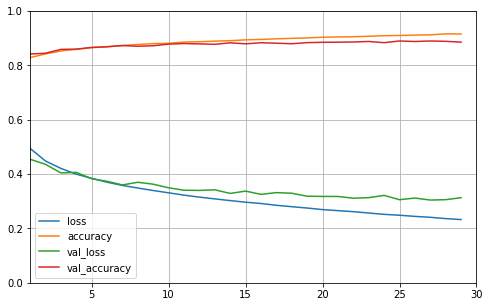

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(1,30)
plt.show()

### How to improve validation accuracy
- adjust learnin_rate of sgd optimizer
- adjust the batch_size (default=32)
- adjust neurons per layer
- adjust number of layers

In [102]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 934us/step - loss: 0.3386 - accuracy: 0.8817


[0.3385784924030304, 0.8816999793052673]

In [109]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2) # round to decimal places

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.07, 0.  , 0.91],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

The model estimates the probability that an instance belongs to all classes

In [121]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_new)
accuracy_score(y_test[:3], y_pred)

1.0